In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import svm

In [161]:
data  = pd.read_csv('train.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


### As we can see the Gender column is string type, so converting to numerical

In [162]:
data.Gender = data.Gender.astype('category')
data.Gender = data.Gender.cat.codes

### Checking for null values

In [163]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

### Filling null values with median of the data

In [164]:
data.Albumin_and_Globulin_Ratio.fillna(data['Albumin_and_Globulin_Ratio'].median(), inplace=True)

### Checking mean of values for each column in each category

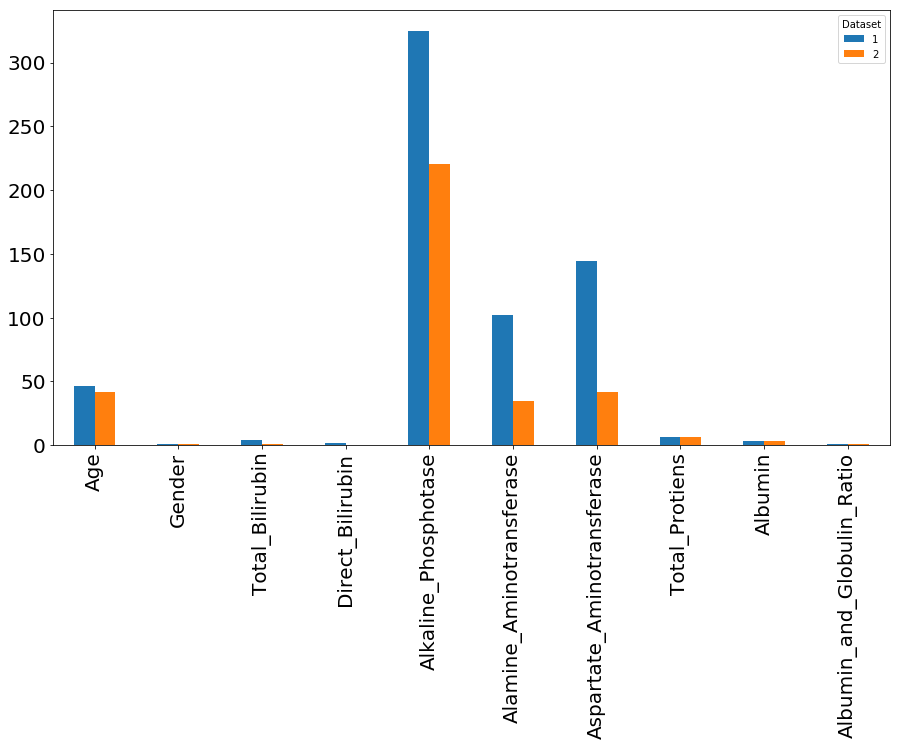

In [165]:
q3 = data.groupby(['Dataset']).mean()
q3.T.plot(kind='bar',figsize=(15,8),fontsize=20)

# Feature Engineering

## Feature 1: One approach can be to extract indirect bilrubin from total - direct bilrubin  but we will see there is high correlation amogst the wo, so there would not be uch use of the new column.


In [166]:
Indirect_Bilirubin = data.Total_Bilirubin - data.Direct_Bilirubin
data['Indirect_Bilirubin'] = Indirect_Bilirubin
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Indirect_Bilirubin
0,60,1,6.3,3.2,314,118,114,6.6,3.7,1.27,1,3.1
1,31,0,0.8,0.2,158,21,16,6.0,3.0,1.00,1,0.6
2,60,1,19.6,9.5,466,46,52,6.1,2.0,0.40,1,10.1
3,34,1,8.7,4.0,298,58,138,5.8,2.4,0.70,1,4.7
4,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1,0.7


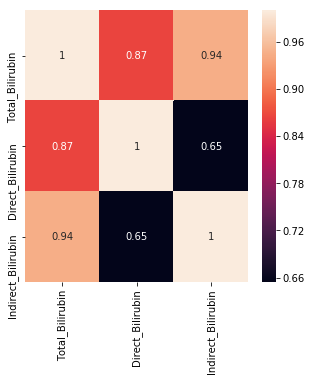

In [167]:
plt.figure(figsize=(5, 5))
corr = data[['Total_Bilirubin','Direct_Bilirubin','Indirect_Bilirubin']].corr()
sns.heatmap(corr,annot=True)

#### We can now see the correaltion amongst the three, hence we can use Direct and Indirect Bilirubin and leave Total bilirubin

## Feature 2: We can extract globulin from albumin and albumin-globulin ratio  as the correlation between them is relatively low.

In [168]:
Globulin = data.Albumin_and_Globulin_Ratio * data.Albumin
data['Globulin'] = Globulin
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Indirect_Bilirubin,Globulin
0,60,1,6.3,3.2,314,118,114,6.6,3.7,1.27,1,3.1,4.699
1,31,0,0.8,0.2,158,21,16,6.0,3.0,1.00,1,0.6,3.000
2,60,1,19.6,9.5,466,46,52,6.1,2.0,0.40,1,10.1,0.800
3,34,1,8.7,4.0,298,58,138,5.8,2.4,0.70,1,4.7,1.680
4,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1,0.7,3.500


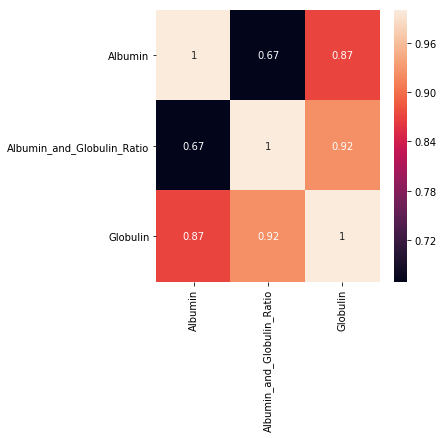

In [169]:
plt.figure(figsize=(5, 5))
corr = data[['Albumin','Albumin_and_Globulin_Ratio','Globulin']].corr()
sns.heatmap(corr,annot=True)

#### We can see there is no use of adding Globulin as correlation is very high

### Checking correlation of features

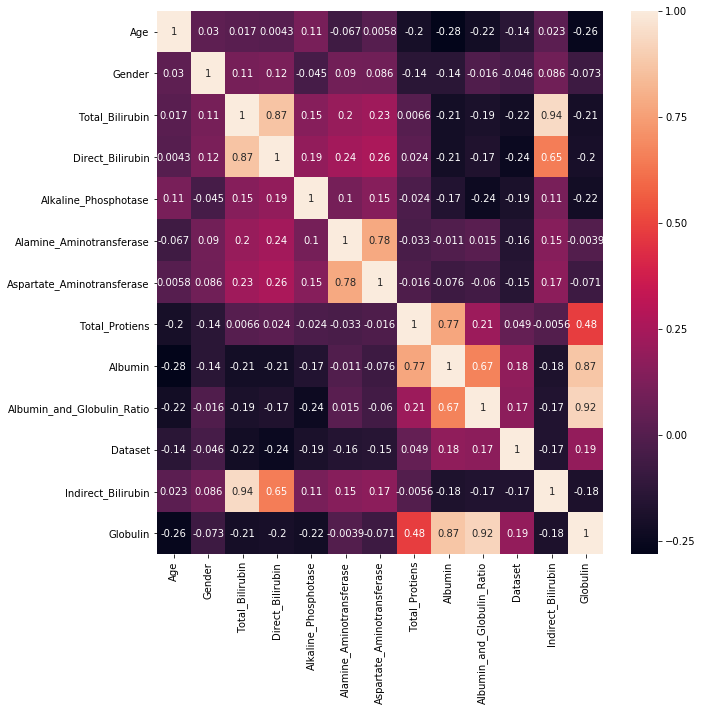

In [170]:
plt.figure(figsize=(10, 10))
corr = data.corr()
sns.heatmap(corr,annot=True)

#### From the above correlation matrix plot, we find direct relationship between the following features:
Direct_Bilirubin & Total_Bilirubin,    
Indirect_Bilirubin & Total_Bilirubin

Aspartate_Aminotransferase & Alamine_Aminotransferase

Total_Protiens & Albumin

Albumin_and_Globulin_Ratio & Albumin,    
Albumin_and_Globulin_Ratio & Globulin

#### Hence, we can very well find that we can omit some of the features. I'm going to keep the follwing features:
Direct_Bilirubin
Indirect_Bilirubin

Alamine_Aminotransferase

Total_Protiens

Albumin_and_Globulin_Ratio

Albumin


### Confirming one of  this observation using joint plots

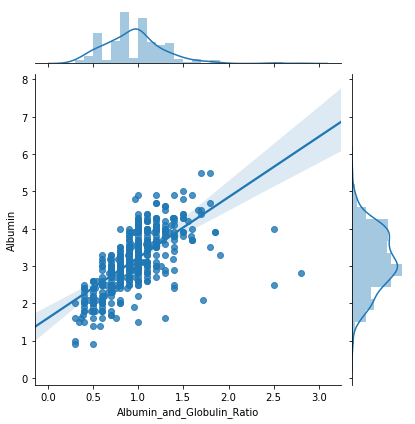

In [171]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=data, kind="reg")


#### This further justifies our claim that these 2 columns are highly correlated

### Preparing X and y columns as features and result

In [172]:
X = data.drop(['Dataset','Total_Bilirubin','Aspartate_Aminotransferase','Globulin'],axis = 1)
y = data.Dataset

### Splitting into training ans test set

In [173]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25)

### Gaussian Naive Bayes

In [174]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
gaussianpredicted=gaussian.predict(X_test)
print('Training Score:',gaussian.score(X_train, y_train))
print('Testing Score:',gaussian.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,gaussianpredicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,gaussianpredicted))

Training Score: 0.5358166189111748
Testing Score: 0.5726495726495726
Accuracy: 0.5726495726495726
Confusion Matrix: 
 [[32 50]
 [ 0 35]]


### Logistic Regression

In [175]:
logistic=LogisticRegression(solver='lbfgs',max_iter=1000)
logistic.fit(X_train,y_train)
logispredicted=logistic.predict(X_test)
print('Training Score:',logistic.score(X_train, y_train))
print('Testing Score:',logistic.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,logispredicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,logispredicted))

Training Score: 0.7478510028653295
Testing Score: 0.6923076923076923
Accuracy: 0.6923076923076923
Confusion Matrix: 
 [[78  4]
 [32  3]]


### SVM

In [176]:
svmclf = svm.SVC(gamma='auto')
svmclf.fit(X_train,y_train)
svmpredicted=logistic.predict(X_test)
print('Training Score:',svmclf.score(X_train, y_train))
print('Testing Score:',svmclf.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,svmpredicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,svmpredicted))

Training Score: 0.997134670487106
Testing Score: 0.7008547008547008
Accuracy: 0.6923076923076923
Confusion Matrix: 
 [[78  4]
 [32  3]]


### Random Forest

In [177]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, y_train)
#Predict Output
predicted = randomforest.predict(X_test)

print('Training Score:',randomforest.score(X_train, y_train))
print('Testing Score:',randomforest.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,predicted))

Training Score: 1.0
Testing Score: 0.6495726495726496
Accuracy: 0.6495726495726496
Confusion Matrix: 
 [[72 10]
 [31  4]]


### Decision Tree Classifier

In [178]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
#Predict Output
predicted = dt.predict(X_test)

print('Training Score:',dt.score(X_train, y_train))
print('Testing Score:',dt.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,predicted))

Training Score: 1.0
Testing Score: 0.6410256410256411
Accuracy: 0.6410256410256411
Confusion Matrix: 
 [[63 19]
 [23 12]]


### Evaluating

In [179]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'Logistic Regression', 'SVM','Random Forest','Decision Tree'],
    'Training Score': [ gaussian.score(X_train, y_train),logistic.score(X_train, y_train), svmclf.score(X_train, y_train), randomforest.score(X_train, y_train),dt.score(X_train, y_train),],
    'Test Score': [ gaussian.score(X_test, y_test),logistic.score(X_test, y_test), svmclf.score(X_test, y_test), randomforest.score(X_test, y_test),dt.score(X_test, y_test),]
    })
models.sort_values(by='Test Score', ascending=False)

,Model,Training Score,Test Score
2,SVM,0.997135,0.700855
1,Logistic Regression,0.747851,0.692308
3,Random Forest,1.000000,0.649573
4,Decision Tree,1.000000,0.641026
0,Gaussian Naive Bayes,0.535817,0.572650


### As we can see, random forest gives us the maximum test score amongst above models,
#### Now using GridSearch to find best hyper-parameters for Random Forrest Classifier

In [180]:
parameters = [{'criterion' : ['gini', 'entropy'],
               'max_depth' : [5, 7, 9, 11, 15, 20],
               'max_features' : [1, 2, 3, 6],
               'n_estimators' : [14, 15, 16, 17, 18, 19],
               'random_state' : [9, 10, 11, 12]}]

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = randomforest,param_grid = parameters,
                           scoring = 'accuracy',n_jobs = -1, cv = 10)

grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
print("Best accuracy of the model for the training set is:", best_accuracy)

best_params = grid_search.best_params_
print("Best parameters of the model for the training set is:", best_params)

Best accuracy of the model for the training set is: 0.7736389684813754
Best parameters of the model for the training set is: {'criterion': 'entropy', 'max_depth': 11, 'max_features': 3, 'n_estimators': 14, 'random_state': 12}


/home/mayday/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [181]:
classifier = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 3,
                                    n_estimators = 14, random_state = 12)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

### Applying k-fold cross validation again to check mean accuracies in dataset

In [182]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, 
                             y = y_train, cv = 10, n_jobs = -1)

print("Showing all 10 of K-Fold Cross Validation accuracies:\n", accuracies)
accuracies_mean = accuracies.mean()
print("\nMean of accuracies:\n", accuracies_mean)
accuracies_std = accuracies.std()
print("\nStandard Deviation:\n", accuracies_std)

Showing all 10 of K-Fold Cross Validation accuracies:
 [0.72222222 0.74285714 0.68571429 0.8        0.77142857 0.77142857
 0.77142857 0.77142857 0.85294118 0.85294118]

Mean of accuracies:
 0.7742390289449113

Standard Deviation:
 0.04960895028713267


### Now training our model on full training set

In [183]:
classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

### According to above findings we use the following classifier for our predictions

In [184]:
test = pd.read_csv('test.csv')
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


### Converting gender column as done for training

In [185]:
test.Gender = test.Gender.astype('category')
test.Gender = test.Gender.cat.codes
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,0,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00


### Checking for null values in test data

In [186]:
print(test.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    1
dtype: int64


### Filling null values with median value of column

In [187]:
test.Albumin_and_Globulin_Ratio.fillna(test['Albumin_and_Globulin_Ratio'].median(), inplace=True)


In [188]:
Indirect_Bilirubin = test.Total_Bilirubin - test.Direct_Bilirubin
test['Indirect_Bilirubin'] = Indirect_Bilirubin
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Indirect_Bilirubin
0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10,0.6
1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50,0.6
2,66,0,4.2,2.1,159,15,30,7.1,2.2,0.40,2.1
3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34,0.5
4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00,1.4


In [195]:
test = test[list(X.columns)]

### Creating a new file for saving the predicted labels for test data

In [196]:
answers = pd.DataFrame(classifier.predict(test))
answers.to_csv('test_data_answers.csv', index=False,header=['Dataset'])

### Appending to test data

In [197]:
test['Dataset'] = answers
test.to_csv('test_data with answers.csv')